# Breast Cancer Detection

## Importing Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

## Importing Dataset

In [47]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [48]:
df1 = df.copy()

In [49]:
df.columns[1:]

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [50]:
df.drop(columns="Unnamed: 32",inplace = True)

In [51]:
df.columns[1:]

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Visual Analysis

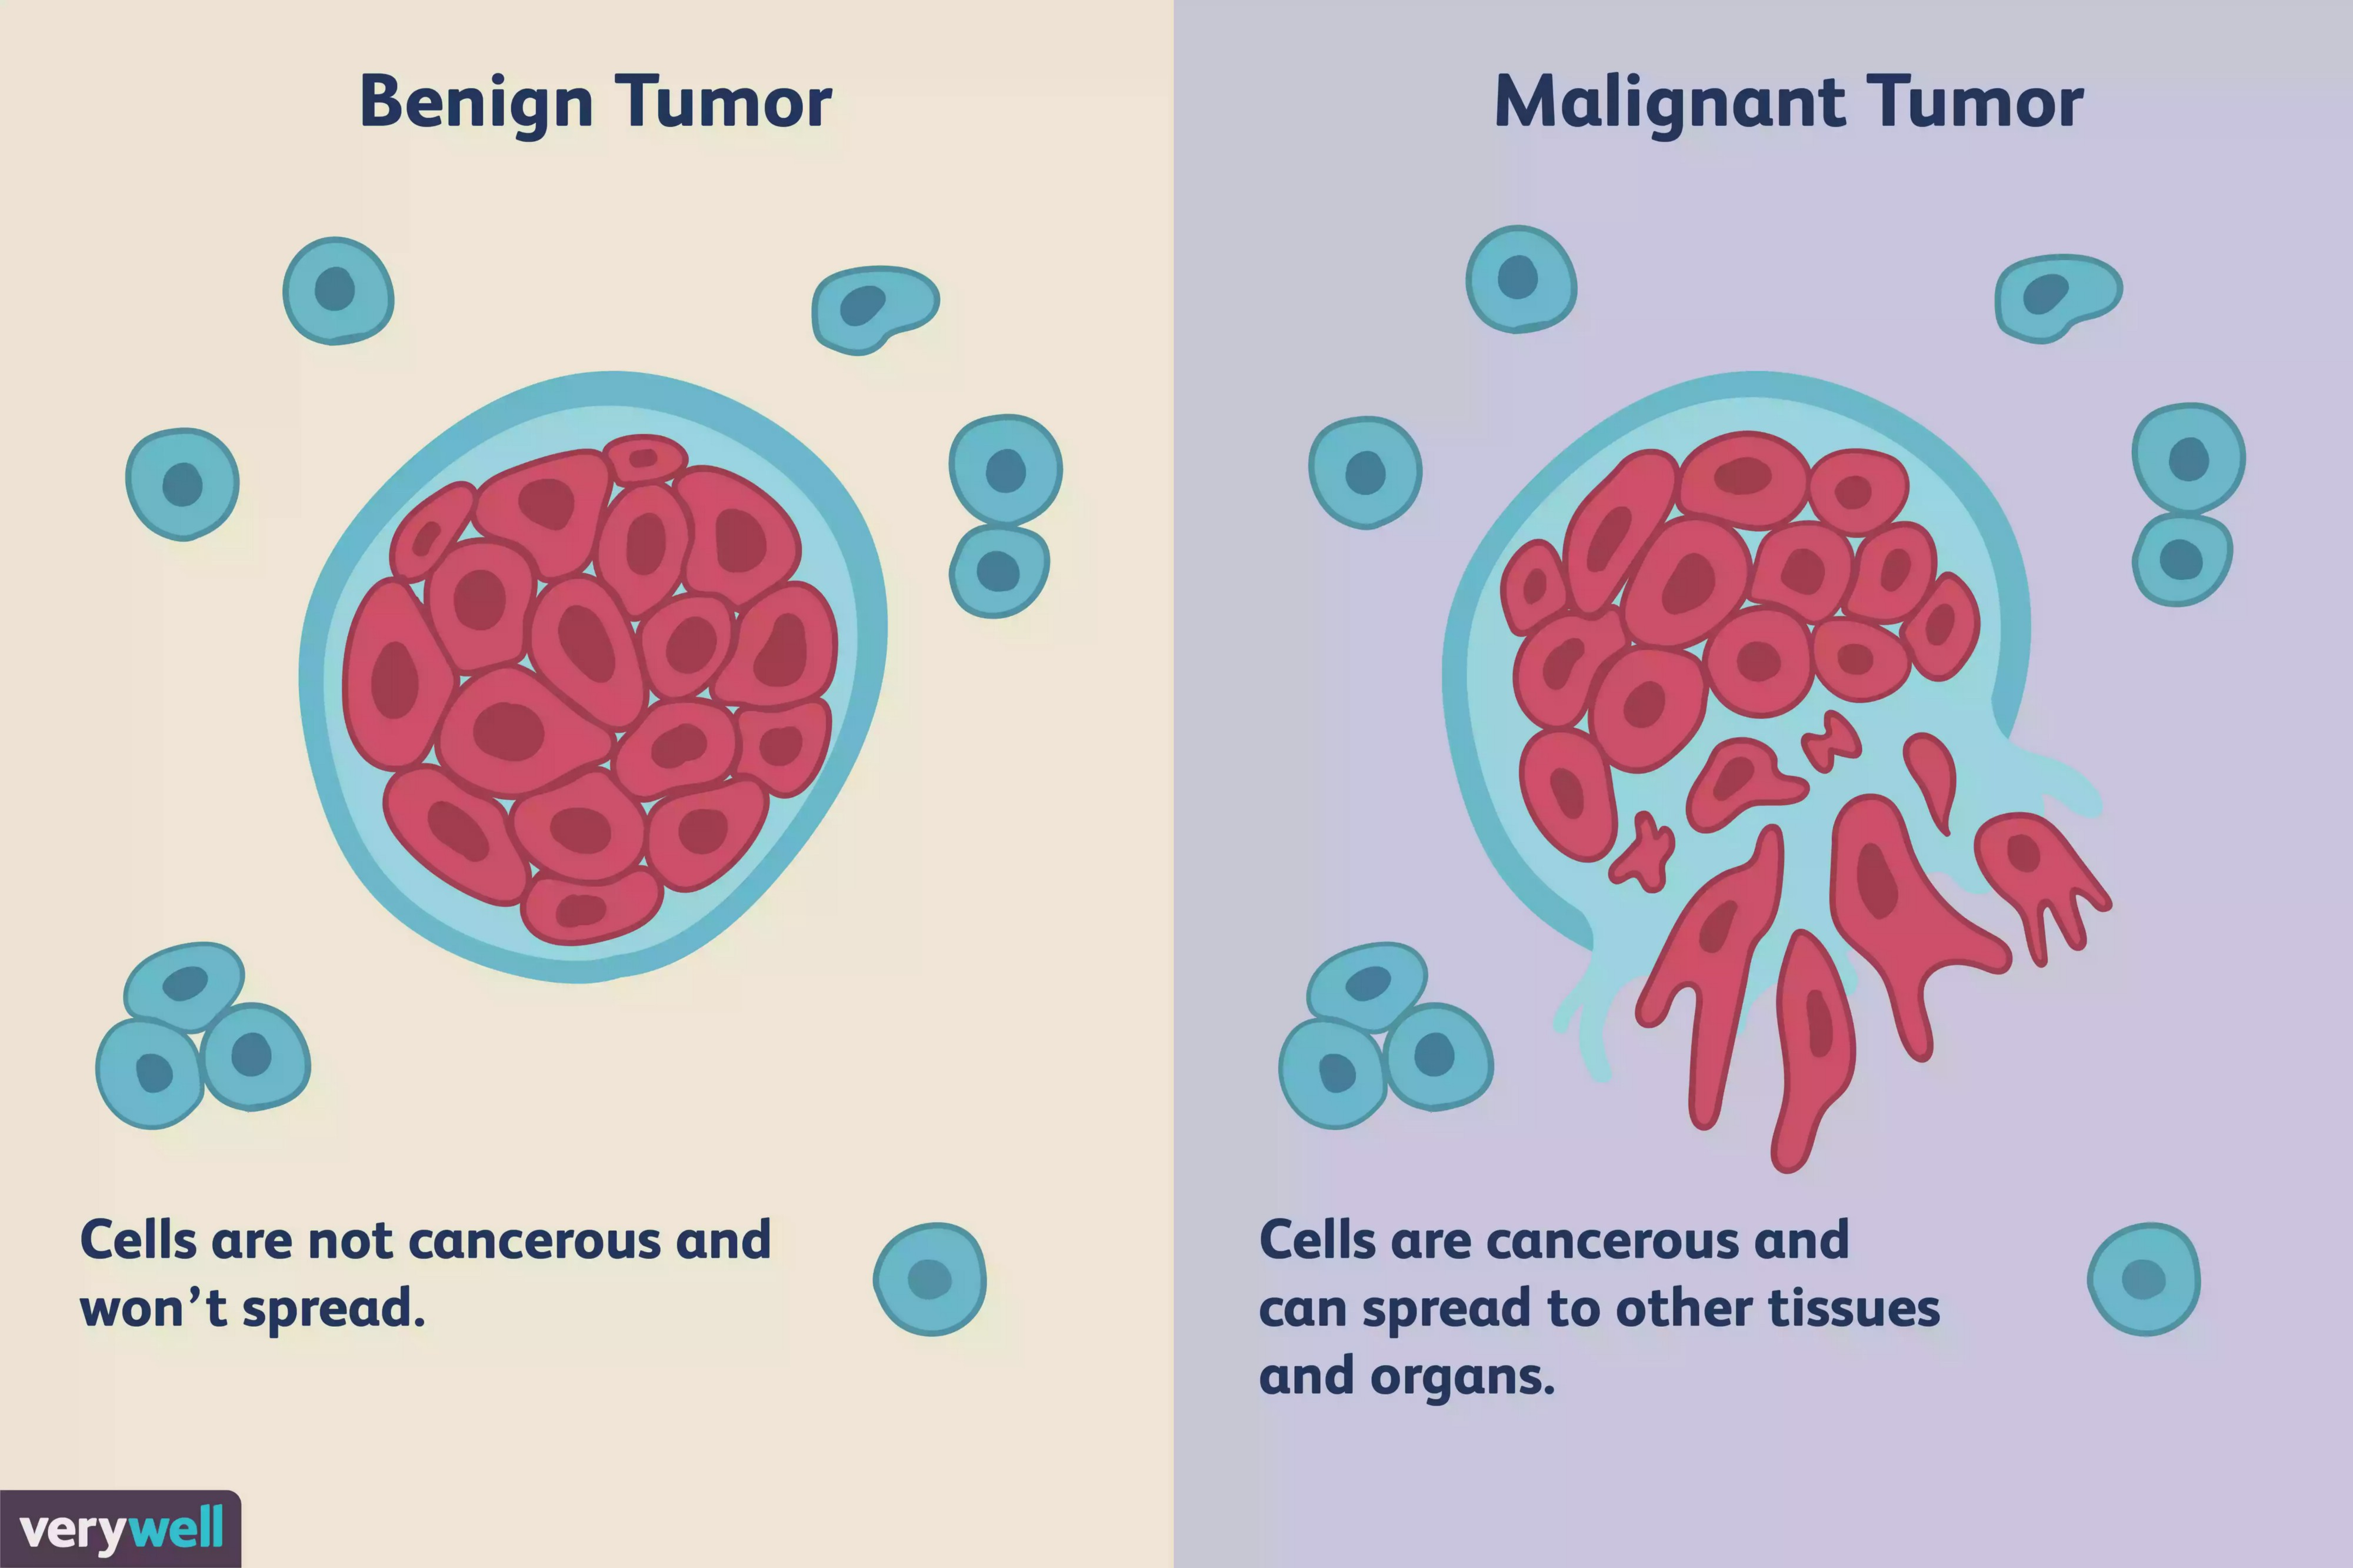

In [52]:
from IPython.display import Image
Image("Visual.png")


### As obvious from the image above, malignant cells are larger in size, thus have a bigger radius, perimeter and area.  Due to an arbitrary shape, the malignant cells are also expected to be more concave, with a large number of concave, finger-like projections.

## Encoding Categorical Values

In [53]:
#Using Label Encoders to replace values in a single column
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()

In [54]:
df["diagnosis"] = labelEncoder.fit_transform(df["diagnosis"])
df["diagnosis"].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

## Plotting the initial data

In [55]:
diagnosis_count = df["diagnosis"].value_counts()
diagnosis_count

0    357
1    212
Name: diagnosis, dtype: int64

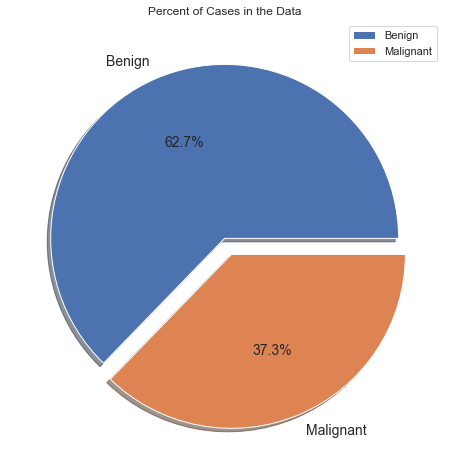

In [56]:
# Pie chart representation
sns.set_theme(style="whitegrid")
pie_labels = ['Benign', 'Malignant']
pie_explode = [0, 0.1]
plt.figure(figsize=(10, 8))
#Number of benign and malignant cases
plt.pie(diagnosis_count, labels=pie_labels, shadow=True,  autopct='%1.1f%%', explode=pie_explode, textprops={'fontsize': 14})
plt.legend()
plt.title("Percent of Cases in the Data")
plt.show()

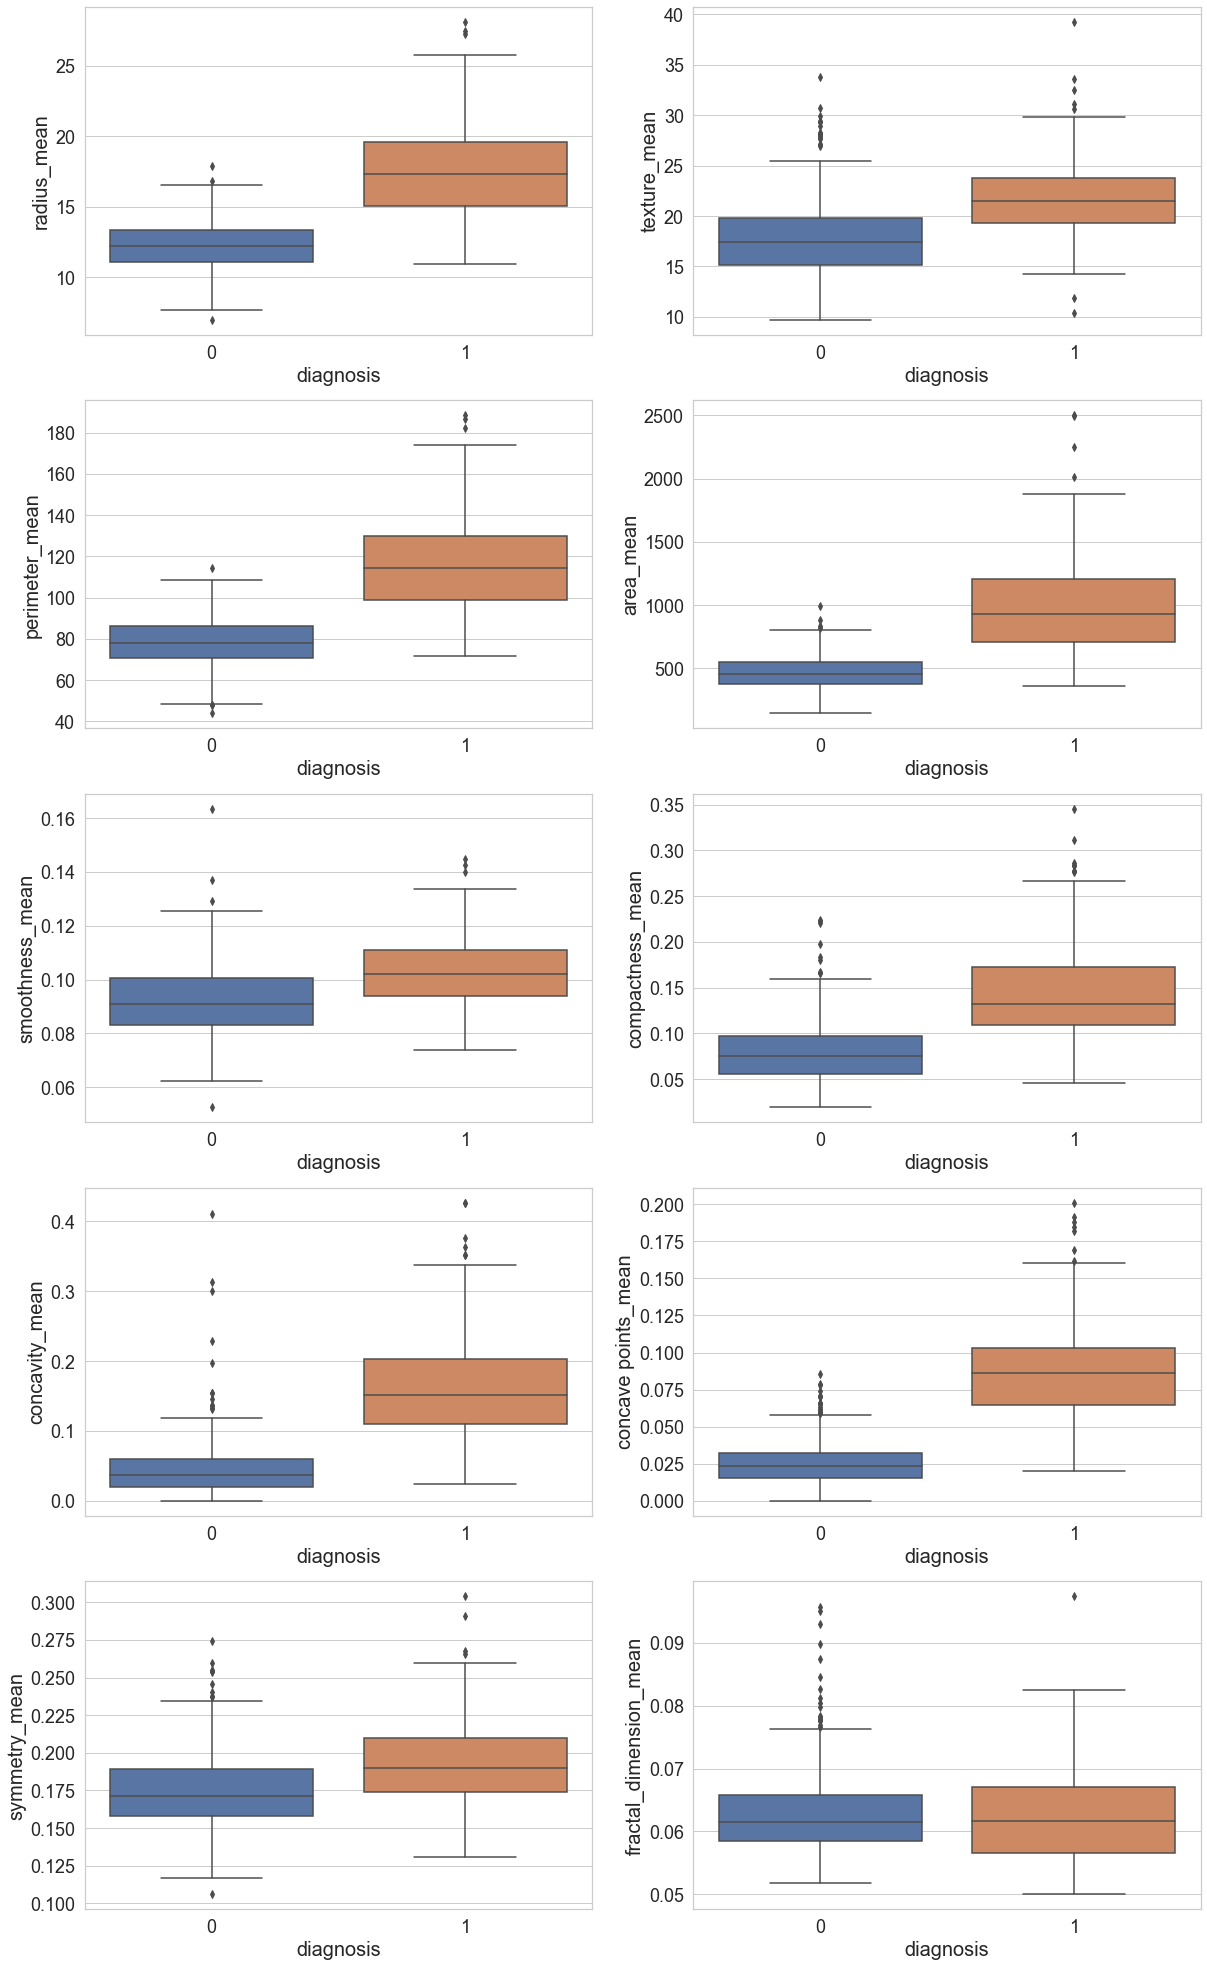

In [57]:
sns.set_theme(style="whitegrid")

x = df['diagnosis']

y = ['radius_mean', 'texture_mean', 'perimeter_mean',
     'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
     'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

fig, axes = plt.subplots(len(y)//2, 2, figsize=(20, 35))
axes_flat = axes.flatten()

index = 0
for para in y:
    axis = axes_flat[index]
    axis.xaxis.label.set_size(20)
    axis.yaxis.label.set_size(20)
    axis.tick_params(labelsize=18)
    
    sns.boxplot(x=x, y=df[para], data=df, ax=axis)
    index += 1
    
plt.show()

The classification of cancer depending on variation in each individual parameter has been shown with the help of boxplots. The following inferrences can be drawn by observing these graphs:-

- For each parameter (eg. radius_mean), more separated the two boxes are, the more significant role the parameter would play in deciding whether the cancer is benign or malignant. This is because, more the separation, more clear would be the signs of an abnormal behaviour by the cells.
- This implies that the "Fractal dimension" of the cell will have little to no impact in determining the outcome.
- Similarly, "Symmetry" of the cell is also not that influential for the result.
- The gap between the boxes (and in turn distribution of data) in "Smoothness" of the cell is not that significant. The upper limit of smoothness in benign cases almost overlaps with the median of the malignant ones. Thus this property of the cell should not be given a lot of weight (but cannot be neglected) in the detection, since there is a probability that it can classify average and below average smoothness cases as benign instead of malignant.
- Almost all the other properties of the cells show a clearer distinction in benign and malignant cases, indicating that they will probably have a stronger say in determination of the result.

Important: It must be noted that the above observations have be made by considering only the middle 50 percentile (i.e the box part) as it is just an human observation rather than a calculated judgement (Which would be too complicated for an initial observation and cannot be done with graphical observation).

In [58]:
y = df["diagnosis"]
df.drop(["diagnosis"],axis = 1 , inplace = True)

In [59]:
y.head(3)

0    1
1    1
2    1
Name: diagnosis, dtype: int32

## More Preprocessing and Scaling

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape)

(398, 31) (171, 31)


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
cols = df.columns

scaled_data = pd.DataFrame(X_train,columns = cols)

scaled_data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.232028,-0.749980,-1.099787,-0.741586,-0.701887,0.584593,-0.427726,-0.457550,-0.760550,-0.099860,...,-0.798483,-0.591967,-0.746602,-0.714529,0.116328,-0.341255,-0.046272,-0.623597,0.077542,0.450628
1,-0.232177,-1.028214,-0.139262,-1.029804,-0.894732,0.742882,-0.731843,-0.843301,-0.808805,-1.159759,...,-1.068703,-0.161981,-1.074343,-0.868941,0.382001,-0.970737,-0.954894,-0.761238,-1.071453,-0.295414
2,-0.170811,-0.538522,-0.299349,-0.568574,-0.550561,-0.714814,-0.731647,-0.639856,-0.668125,0.581758,...,-0.558512,-0.051227,-0.614110,-0.552748,-0.471637,-0.485919,-0.384602,-0.504704,0.349008,-0.133716
3,-0.232322,1.147577,-0.146430,1.061698,1.035628,-0.762301,-0.380637,-0.091016,0.221141,-0.663712,...,0.998276,0.134448,0.914190,0.863760,-0.397597,-0.057793,0.441794,0.638339,0.495789,-0.799466
4,-0.232412,-2.004538,-1.376954,-1.962370,-1.415904,1.476766,-0.557221,-1.137578,-1.263267,0.439011,...,-1.699888,-0.976348,-1.665615,-1.187480,1.126757,-0.867778,-1.391304,-1.756275,0.063338,0.563260


### Finding the best model

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [64]:
#create param
model_param = {
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini','entropy']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'param' : {
            'n_estimators': [1,5,10]
        }
    },
        'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': [5,10,15,20,25]
        }
    },
        'SVC':{
        'model':SVC(),
        'param':{
            'kernel':['rbf','linear','sigmoid'],
            'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
         
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'param': {}
    },
      "Logistic Regression":{
          "model" : LogisticRegression(random_state = 0, penalty='l1', solver='liblinear'),
          "param" : {
              "C" : [0.001,0.01,0.1,1,10,100,1000],
         'penalty': ['l1','l2']
          }
      }
}

In [65]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [66]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,DecisionTreeClassifier,0.922057,{'criterion': 'entropy'}
1,random_forest,0.957310,{'n_estimators': 10}
2,KNeighborsClassifier,0.957310,{'n_neighbors': 10}
3,SVC,0.985000,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}"
4,naive_bayes_gaussian,0.942247,{}
5,Logistic Regression,0.982468,"{'C': 0.1, 'penalty': 'l2'}"


The above results tells us that SVC model is the most accurate for prediction of Breast Cancer w.r.t the dataset collected by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA.

In [67]:
model_svc = SVC( C = 0.1 , kernel = "linear" , gamma = 1)
model_svc.fit(X_train,y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [68]:
Y_pred = model_svc.predict(X_test)

### Confusion Matrix

In [73]:
class_names = df1["diagnosis"].unique()
class_names

array(['M', 'B'], dtype=object)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[106   2]
 [  3  60]]


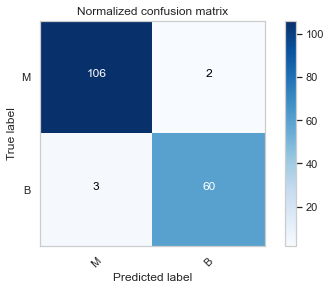


Specificity is: 98.15%

Sensitivity is: 95.24%


In [82]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                      title='Normalized confusion matrix')
plt.grid(False)
plt.show()
#Print Important Medical terms
Specificity = (cnf_matrix[0][0]) / (cnf_matrix[0][0] + cnf_matrix[0][1])
print("\nSpecificity is: {0:.2f}%".format(Specificity*100))

Sensitivity = (cnf_matrix[1][1]) / (cnf_matrix[1][1] + cnf_matrix[1][0])
print("\nSensitivity is: {0:.2f}%".format(Sensitivity*100))

# Conclusion

The final model has a commendable Specificity of 98.15%, implying that the model can correctly identify 98% of the people without Breast Cancer.
The model also has a Sensitivity of 95.24%, implying that the model can correctly identify approximately 95% of the people with Breast Cancer.